REGRESIÓN MULTINOMIAL


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()
iris_data = iris.data
iris_target = iris.target
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)
iris_df['target'] = iris_target
pd.concat([iris_df.head(), iris_df.tail()])

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [3]:
def check_null(df):
    return False
check_null(iris_df)

False

Se analizaron los datos en primer lugar y se halló que no faltaba ninguno

c:\Users\danie\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


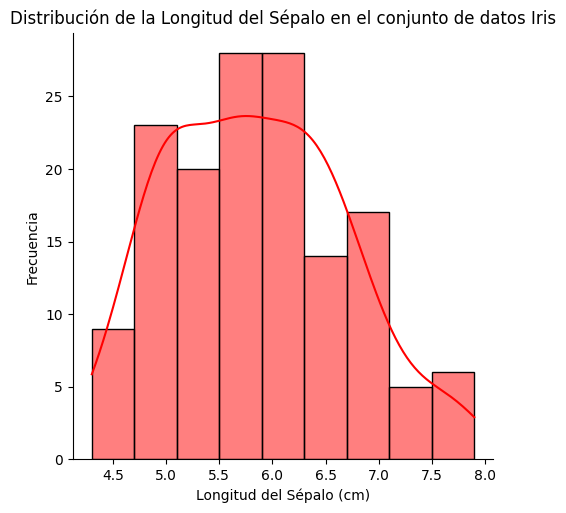

In [4]:
sns.displot(x='sepal length (cm)', data=iris_df, color='red', kde=True)
plt.xlabel('Longitud del Sépalo (cm)')
plt.ylabel('Frecuencia')
plt.title('Distribución de la Longitud del Sépalo en el conjunto de datos Iris')
plt.show()

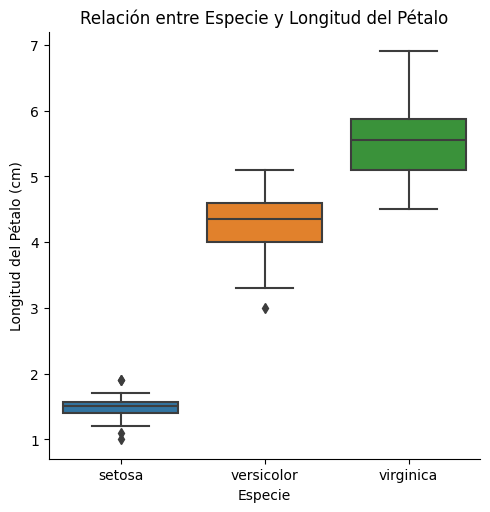

In [46]:
iris_df['target_name'] = iris.target_names[iris.target]
iris_data_with_target = iris_df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'target_name']]
sns.catplot(x="target_name", y="petal length (cm)", data=iris_data_with_target, kind="box")
plt.xlabel('Especie')
plt.ylabel('Longitud del Pétalo (cm)')
plt.title('Relación entre Especie y Longitud del Pétalo')
plt.show()

Para este apartado se puede apreciar que la distribución de la longitud del sépalo de todos los datos sigue una distribución normal, además los boxplot indican que la especie setosa poseen los pétalos más cortos, le siguen los versicolor y las más largas son las de virginica

In [47]:
X = iris_df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
print(X.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [48]:
y = iris_df['target']
print(y.head())

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32


In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
print("Forma de X_train:", X_train.shape)
print("Forma de X_test:", X_test.shape)
print("Forma de y_train:", y_train.shape)
print("Forma de y_test:", y_test.shape)

Forma de X_train: (105, 4)
Forma de X_test: (45, 4)
Forma de y_train: (105,)
Forma de y_test: (45,)


In [50]:
from sklearn.linear_model import LogisticRegression  
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

In [51]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       2, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 2, 2,
       1])

In [52]:
result = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})
result

,Actual,Predicted
14,0,0
98,1,1
75,1,1
16,0,0
131,2,2
56,1,1
141,2,2
44,0,0
29,0,0
120,2,2


In [53]:
classifier.coef_

array([[-0.4337728 ,  0.75700544, -2.24362365, -0.9300095 ],
       [ 0.58196284, -0.53636625, -0.13079618, -0.79884557],
       [-0.14819004, -0.22063919,  2.37441983,  1.72885507]])

In [54]:
classifier.intercept_ 

array([  9.18415914,   1.72225452, -10.90641365])

In [55]:
print(classifier.predict_proba(X))

[[9.78631752e-01 2.13679657e-02 2.82264015e-07]
 [9.67096231e-01 3.29033399e-02 4.29529833e-07]
 [9.82940067e-01 1.70597195e-02 2.13682553e-07]
 [9.73492887e-01 2.65065420e-02 5.71148228e-07]
 [9.82962574e-01 1.70371757e-02 2.49868740e-07]
 [9.66970510e-01 3.30280924e-02 1.39780491e-06]
 [9.85074602e-01 1.49250434e-02 3.54342638e-07]
 [9.73017105e-01 2.69824178e-02 4.77278238e-07]
 [9.77229068e-01 2.27705174e-02 4.14920677e-07]
 [9.64834164e-01 3.51653628e-02 4.72719816e-07]
 [9.72533006e-01 2.74665956e-02 3.98832567e-07]
 [9.72802454e-01 2.71968308e-02 7.15203270e-07]
 [9.70556684e-01 2.94429949e-02 3.21121087e-07]
 [9.90407381e-01 9.59254758e-03 7.10838661e-08]
 [9.84968969e-01 1.50309467e-02 8.45019400e-08]
 [9.84347002e-01 1.56526200e-02 3.77553645e-07]
 [9.85541731e-01 1.44580445e-02 2.24632211e-07]
 [9.78355657e-01 2.16439745e-02 3.68134055e-07]
 [9.50538894e-01 4.94598404e-02 1.26530981e-06]
 [9.81797943e-01 1.82016201e-02 4.37234811e-07]
 [9.40270112e-01 5.97285861e-02 1.302065

En este caso cada fila representa un dato y los valores representan la probabilidad de que pertenezcan a algun tipo de flor, por ejemplo, para la primera fila o primer dato la probabilidad de que pertenezca al primer tipo es cercano al 98%, esto dado al número que va en la primera columna, y así sucesivamente.

In [56]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred)
cf_matrix

array([[14,  0,  0],
       [ 0, 17,  1],
       [ 0,  0, 13]], dtype=int64)

Para la clase 0 (la primera fila), hay 14 instancias que fueron clasificadas correctamente como clase 0 (verdaderos positivos). No hubo falsos positivos o falsos negativos en esta clase.
Para la clase 1 (la segunda fila), hay 17 instancias que fueron clasificadas correctamente como clase 1 (verdaderos positivos). También hay 1 instancia que fue clasificada incorrectamente como clase 2 (falso negativo).
Para la clase 2 (la tercera fila), hay 13 instancias que fueron clasificadas correctamente como clase 2 (verdaderos positivos). No hubo falsos positivos o falsos negativos en esta clase.

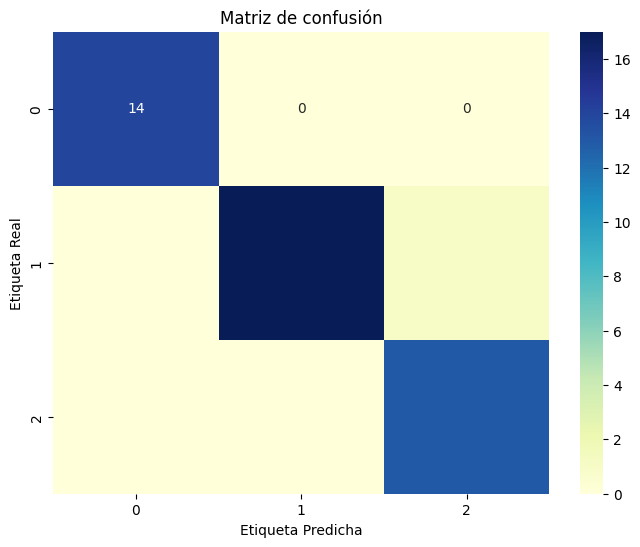

In [57]:
plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(cf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Matriz de confusión')
plt.ylabel('Etiqueta Real')
plt.xlabel('Etiqueta Predicha')
plt.show()

In [58]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9777777777777777

Este puntaje de precisión se relaciona con lo anterior, este nos indica la precisión del modelo que como se evidenció con el análisis de la matriz de confusión es bastante alta, aproximadamente del 98% por lo que es un modelo muy preciso casi perfecto

In [59]:
target_names = ['Setosa', 'Versicolor', 'Virginica']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        14
  Versicolor       1.00      0.94      0.97        18
   Virginica       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



Para finalizar, la columna de precisión indica los valores que fueron dados como positivos y efectivamente lo son, es decir, verdaderos positivos, por lo que se aprecia en general una precisión del modelo casi perfecta de no ser por el 93% de la clase de virginica, por otro lado, el recall indica la sensibilidad del modelo, es decir, las instancias positivas que fueron correctamente identificadas por el modelo, nuevamente, bastante positivo para el modelo, después, el f1-score indica la armonía general entre precisión y recall, un F1-score alto indica un buen equilibrio entre precisión y recall. Por último, el soporte es el número de instancias en cada clase en el conjunto de prueba.